In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
filename= input("Please enter the file name:")
df=pd.read_csv(filename)
df



FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
path='F:\Python\DataReport\sales2019_1.csv'
dataframe=pd.read_csv(path)
dataframe.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [ ]:
# Task 2 Clean and reprocess data

Task 2.1 Merge 12 Month Data

In [ ]:
'''path='F:/Python/DataReport/'
#frames=[]
#for file in os.listdir(path):
    #if file.endswith('.csv'):
        #filepath=path+file
        df1=pd.read_csv(filepath)
        frames.append(df1)
        result=pd.concat(frames)
result
len(result)
df=result
df.to_csv('annualSales2019.csv',index=False)
'''


"path='F:/Python/DataReport/'\n#frames=[]\n#for file in os.listdir(path):\n    #if file.endswith('.csv'):\n        #filepath=path+file\n        df1=pd.read_csv(filepath)\n        frames.append(df1)\n        result=pd.concat(frames)\nresult\nlen(result)\ndf=result\ndf.to_csv('annualSales2019.csv',index=False)\n"

In [ ]:
df['Month']=''
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",


In [ ]:
df['Month']=df['Order Date'].str[0:2]
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
print(set(df['Month']))
df=df.dropna(how='all')
print(set(df['Month']))

df=df[df['Month']!='Or']

{nan, '10', '08', '01', 'Or', '03', '04', '11', '12', '06', '07', '05', '09', '02'}
{'10', '08', '01', 'Or', '03', '04', '11', '12', '06', '07', '05', '09', '02'}


In [ ]:
print(set(df['Month']))

{'10', '08', '01', '03', '04', '11', '12', '06', '07', '05', '09', '02'}


In [ ]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each']=pd.to_numeric(df['Price Each'],downcast='float')

int8
float32


TASK 3: WHAT WAS THE MONTH WITH THE BEST SALES?
HOW MUCH SLAES FOR THAT MONTH?

In [ ]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
moving_column=df.pop("Sales")
df.insert(4,'Sales',moving_column)
df.groupby('Month').sum()['Sales']
sales_value=df.groupby('Month').sum()['Sales']
sales_value
sales_value.max()


4613443.5

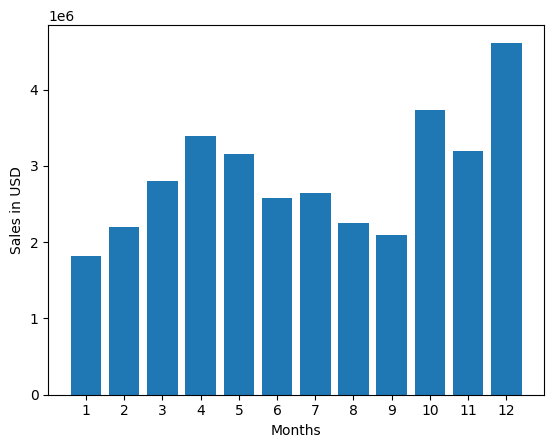

In [ ]:
months=range(1,13)
plt.bar(x=months,height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
    address_to_city=lambda address:address.split(',')[1]
    


In [ ]:
df['City']=df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']


City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [ ]:
sales_value_byCity=df.groupby('City').sum()['Sales']
sales_value_byCity.max()

8262204.0

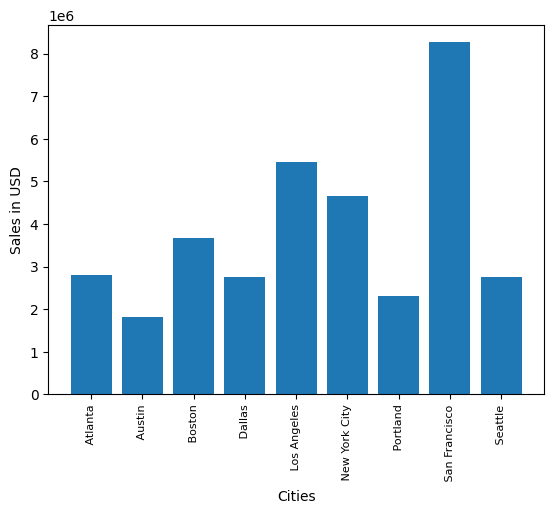

In [ ]:
cities=[city for city,sales in sales_value_byCity.items()]
plt.bar(x=cities,height=sales_value_byCity)
plt.xticks(cities,rotation=90,size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hours']=df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
186846,259354,iPhone,1,700.000000,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
186847,259355,iPhone,1,700.000000,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


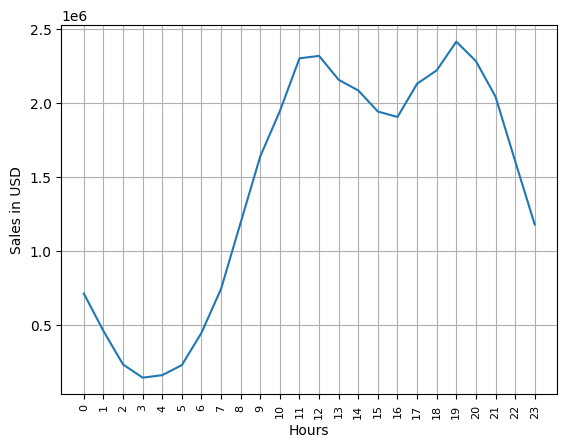

In [ ]:
sales_value_byHours=df.groupby('Hours').sum()['Sales']
sales_value_byHours.max()
Hours=[hour for hour,sales in sales_value_byHours.items()]
plt.plot(Hours,sales_value_byHours)
plt.xticks(Hours,rotation=90,size=8)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()


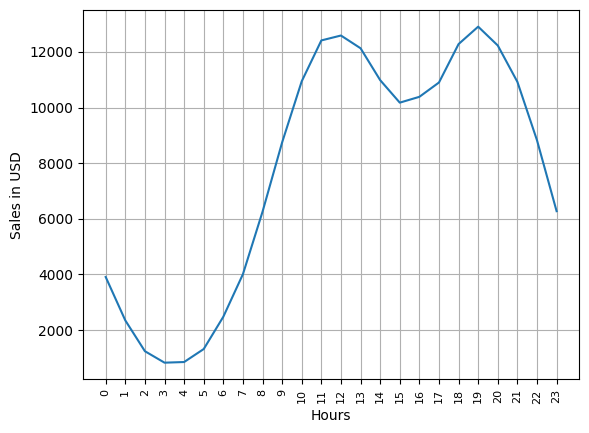

In [ ]:
sales_value_byHours=df.groupby('Hours').count()['Sales']
sales_value_byHours.max()
Hours=[hour for hour,sales in sales_value_byHours.items()]
plt.plot(Hours,sales_value_byHours)
plt.xticks(Hours,rotation=90,size=8)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()


TASK 3.3 FIND DUPLICATED ORDER ID

In [ ]:
groupProduct= lambda product:', '.join(product)

In [ ]:
df_dup=df[df['Order ID'].duplicated(keep=False)]

df_dup['All Product']=df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_duf


C:\Users\DTTRUNG\AppData\Local\Temp\ipykernel_6528\1828594108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product']=df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,NaN
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,NaN
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,NaN
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,NaN
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20,NaN
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,NaN
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0,NaN
11677,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13,NaN


In [ ]:
df_dup=df_dup[['Order ID','All Product']].drop_duplicates()
df_dup['Order ID']=pd.to_numeric(df_dup['Order ID'])
df_dup.loc[df_dup['Order ID'] == 162009]
df_dup['All Product'].value_counts().head(10)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Product, dtype: int64

In [ ]:
all_product=df.groupby('Product').sum()['Quantity Ordered']
all_product

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

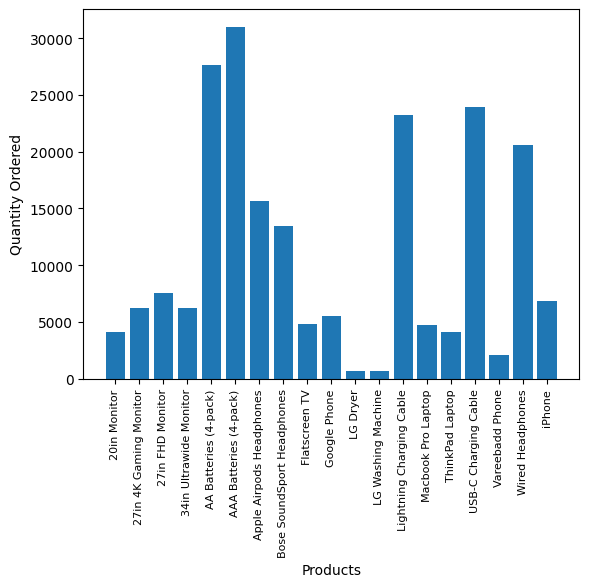

In [ ]:
sales_value_byProducts=df.groupby('Product').sum()['Quantity Ordered']
sales_value_byHours.max()
products=[product for product,sales in sales_value_byProducts.items()]
plt.bar(products,sales_value_byProducts)
plt.xticks(products,rotation=90,size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

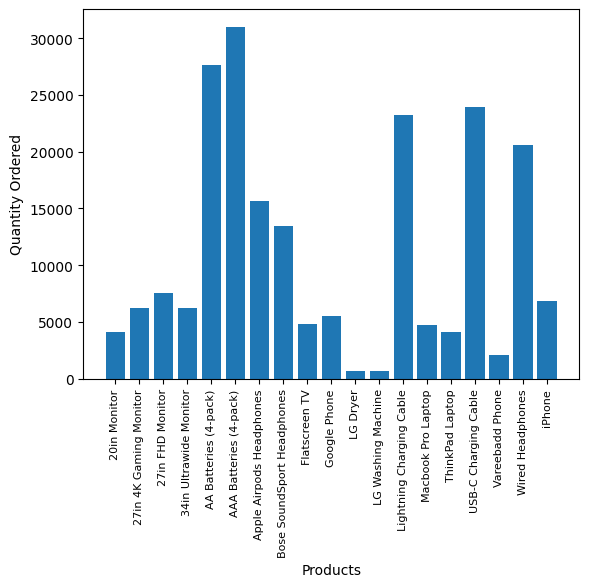

In [ ]:
sales_value_byProducts=df.groupby('Product').sum()['Quantity Ordered']
prices=df.groupby('Product').mean()['Price Each']
prices

sales_value_byHours.max()
products=[product for product,sales in sales_value_byProducts.items()]
plt.bar(products,sales_value_byProducts)
plt.xticks(products,rotation=90,size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

In [ ]:
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\DTTRUNG\AppData\Local\Temp\ipykernel_6528\3839961462.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation=90,size=8)


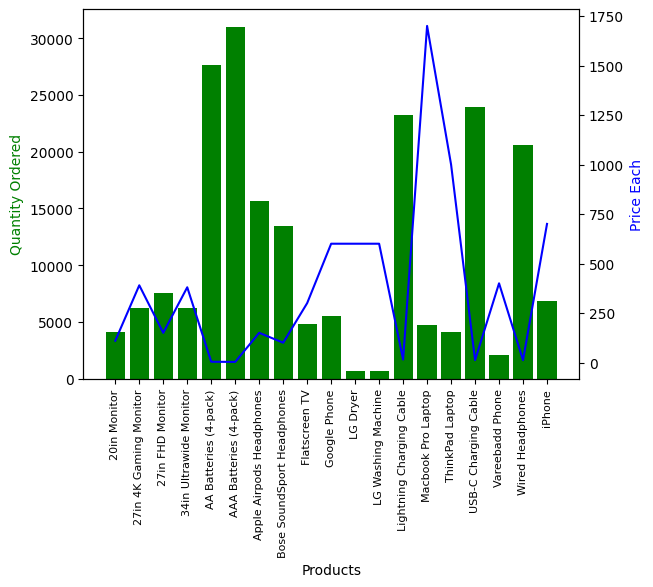

In [ ]:
x=products
y1=sales_value_byProducts
y2=prices

fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(x,y1,color='g')
ax2.plot(x,y2,'-b')


ax1.set_xticklabels(products,rotation=90,size=8)
ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered",color='g')
ax2.set_ylabel("Price Each",color='b')
plt.show()
